In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time


In [13]:
from ppo import train_ppo, PPOAgent
from sb3_model import train_sb3_ppo
from random_model import train_random_agent
from comparison import compare

In [14]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

ENV_NAME = "Acrobot-v1" 
TOTAL_TIMESTEPS = 1000000  

print(f"Environment: {ENV_NAME}")
print(f"Training timesteps: {TOTAL_TIMESTEPS}")

Environment: Acrobot-v1
Training timesteps: 1000000


In [15]:
results = {
    'models': [],
    'training_times': [],
    'episode_rewards': [],
    'final_performance': []
}

In [16]:
print("\nTraining Random Agent...")
start_time = time.time()
random_scores = train_random_agent(ENV_NAME, TOTAL_TIMESTEPS)
random_training_time = time.time() - start_time

results['models'].append('Random Agent')
results['training_times'].append(random_training_time)
results['episode_rewards'].append(random_scores)
results['final_performance'].append(np.mean(random_scores[-10:]) if len(random_scores) >= 10 else np.mean(random_scores))

print(f"Random Agent completed - Time: {random_training_time:.2f}s")


Training Random Agent...
Training Random Agent...
  Random Episode 100: Avg Score = -2070.37
  Random Episode 200: Avg Score = -2206.18
  Random Episode 300: Avg Score = -2178.06
  Random Episode 400: Avg Score = -2353.41
Random Agent completed - Time: 34.98s


In [17]:
print("\nTraining PPO Custom...")
start_time = time.time()
ppo_scores, ppo_agent = train_ppo(ENV_NAME, TOTAL_TIMESTEPS, save_model_flag=False)
ppo_training_time = time.time() - start_time

results['models'].append('PPO Custom')
results['training_times'].append(ppo_training_time)
results['episode_rewards'].append(ppo_scores)
results['final_performance'].append(np.mean(ppo_scores[-10:]) if len(ppo_scores) >= 10 else np.mean(ppo_scores))

print(f"PPO Custom completed - Time: {ppo_training_time:.2f}s")


Training PPO Custom...
Training PPO...
Horizon: 2048, Epochs: 10, Minibatch: 64
Update at timestep 2048 (horizon reached)
Update at timestep 4096 (horizon reached)
Episode 10, Timesteps: 5000
   Last episode: -500.0 steps
   Avg (last 10): -500.0 (min: -500.0, max: -500.0)
Update at timestep 6144 (horizon reached)
Update at timestep 8192 (horizon reached)
Episode 20, Timesteps: 10000
   Last episode: -500.0 steps
   Avg (last 10): -500.0 (min: -500.0, max: -500.0)
Update at timestep 10240 (horizon reached)
Update at timestep 12288 (horizon reached)
Update at timestep 14336 (horizon reached)
Episode 30, Timesteps: 15000
   Last episode: -500.0 steps
   Avg (last 10): -500.0 (min: -500.0, max: -500.0)
Update at timestep 16384 (horizon reached)
Update at timestep 18432 (horizon reached)
Episode 40, Timesteps: 20000
   Last episode: -500.0 steps
   Avg (last 10): -500.0 (min: -500.0, max: -500.0)
Update at timestep 20480 (horizon reached)
Update at timestep 22528 (horizon reached)
Update 

In [18]:
print("\nTraining Stable-Baselines3 PPO...")
sb3_model, sb3_scores, sb3_training_time = train_sb3_ppo(ENV_NAME, TOTAL_TIMESTEPS)

results['models'].append('SB3 PPO')
results['training_times'].append(sb3_training_time)
results['episode_rewards'].append(sb3_scores)
results['final_performance'].append(np.mean(sb3_scores[-10:]) if len(sb3_scores) >= 10 else np.mean(sb3_scores))

print(f"SB3 PPO completed - Time: {sb3_training_time:.2f}s")


Training Stable-Baselines3 PPO...
🏗️  Training Stable-Baselines3 PPO...
  SB3 Episode 50: Avg Reward (last 50) = -358.02
  SB3 Episode 100: Avg Reward (last 50) = -146.96
  SB3 Episode 150: Avg Reward (last 50) = -133.60
  SB3 Episode 200: Avg Reward (last 50) = -101.06
  SB3 Episode 250: Avg Reward (last 50) = -101.62
  SB3 Episode 300: Avg Reward (last 50) = -85.76
  SB3 Episode 350: Avg Reward (last 50) = -88.94
  SB3 Episode 400: Avg Reward (last 50) = -83.66
  SB3 Episode 450: Avg Reward (last 50) = -87.82
  SB3 Episode 500: Avg Reward (last 50) = -90.14
  SB3 Episode 550: Avg Reward (last 50) = -83.40
  SB3 Episode 600: Avg Reward (last 50) = -82.86
  SB3 Episode 650: Avg Reward (last 50) = -88.32
  SB3 Episode 700: Avg Reward (last 50) = -85.86
  SB3 Episode 750: Avg Reward (last 50) = -87.66
  SB3 Episode 800: Avg Reward (last 50) = -81.42
  SB3 Episode 850: Avg Reward (last 50) = -82.18
  SB3 Episode 900: Avg Reward (last 50) = -82.80
  SB3 Episode 950: Avg Reward (last 50) =

In [19]:
compare(ppo_scores=ppo_scores, sb3_scores=sb3_scores, random_scores=random_scores)



CONFRONTO MODELLI (3 modelli)
Pos  Modello         Score Finale Score Medio  Max      Std      Episodi 
--------------------------------------------------------------------------------
🥇    SB3 PPO              -82.1       -82.2     -58    36.9   12035
🥈    PPO Custom           -88.9      -100.4     -59    73.6    9868
🥉    Random Agent       -2325.7     -2214.1    -470  1571.4     451

ANALISI DETTAGLIATA
--------------------------------------------------
Migliore: SB3 PPO (-82.1)
Peggiore: Random Agent (-2325.7)
📈 Differenza: 2243.6 punti (+inf%)

MIGLIORAMENTO vs RANDOM:
   PPO Custom: Score assoluto: -88.9
   SB3 PPO: Score assoluto: -82.1

STABILITÀ (minore std = più stabile):
   🎯 SB3 PPO: σ = 36.9
   ⚡ PPO Custom: σ = 73.6
   📊 Random Agent: σ = 1571.4


{'models': {'ppo': {'name': 'PPO Custom',
   'scores': [-500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,
    -500.0,


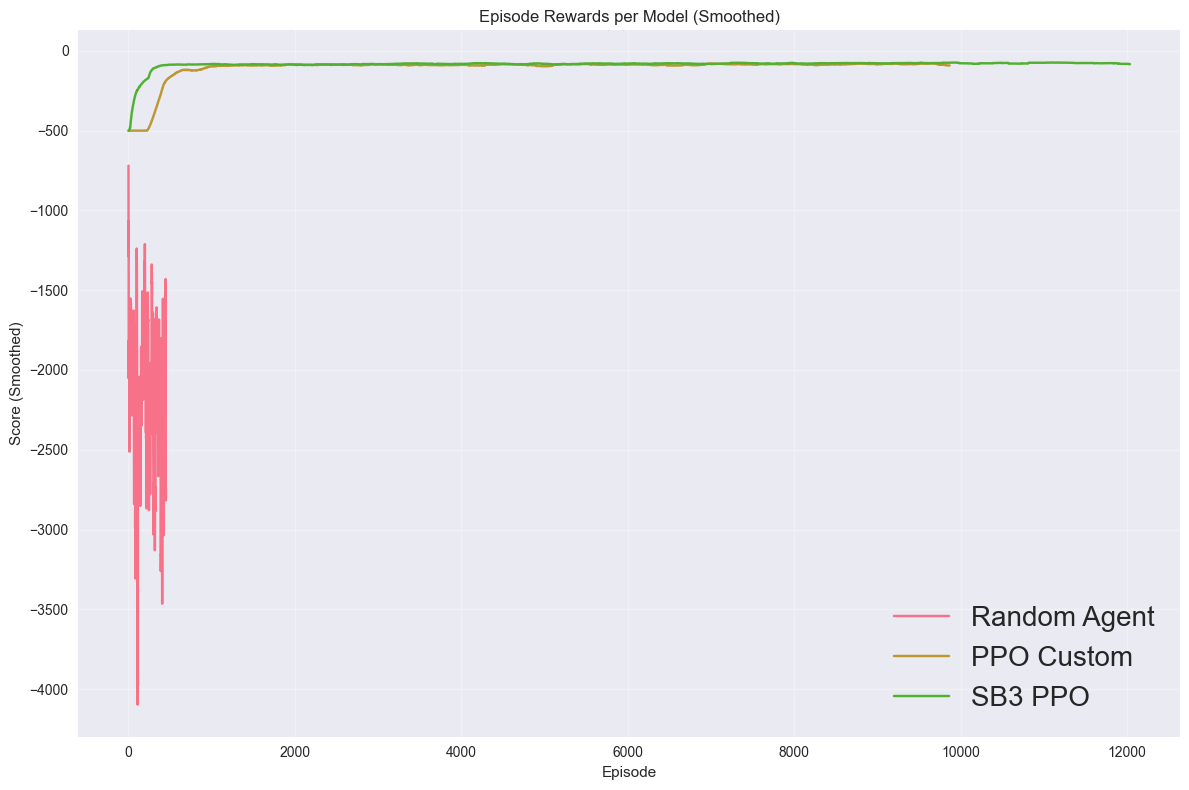

In [20]:
for model_name, scores in zip(results['models'], results['episode_rewards']):
    # Smooth the scores with a rolling mean for better visualization
    window = max(1, len(scores) // 50)
    smoothed = pd.Series(scores).rolling(window, min_periods=1).mean()
    plt.plot(range(1, len(scores) + 1), smoothed, label=model_name)

plt.xlabel('Episode')
plt.ylabel('Score (Smoothed)')
plt.title('Episode Rewards per Model (Smoothed)')
plt.legend(fontsize=20)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [21]:
import gymnasium as gym
import torch
import numpy as np
import cv2
import os
from datetime import datetime
from IPython.display import Video


VIDEO_NAME = f'my_ppo_episode_{datetime.now().strftime("%Y%m%d_%H%M%S")}.mp4'
MAX_STEPS = 500

print(f"Registrando un episodio del tuo modello PPO...")
print(f"Environment: {ENV_NAME}")
print(f"Video: {VIDEO_NAME}")

# Crea environment con render
env = gym.make(ENV_NAME, render_mode='rgb_array')

# Reset environment
state = env.reset()
if isinstance(state, tuple):
    state = state[0]

# Lista per salvare i frames
frames = []
episode_score = 0
step = 0

print(f"🎮 Inizio episodio...")

# Gioca un episodio completo
while step < MAX_STEPS:
    # Cattura frame
    frame = env.render()
    frames.append(frame)
    
    # Azione del modello (assicurati che ppo_agent sia definito)
    with torch.no_grad():
        action, _, _ = ppo_agent.policy.act(torch.FloatTensor(state).unsqueeze(0))
    
    # Esegui azione
    next_state, reward, done, _, _ = env.step(action)
    
    state = next_state
    episode_score += reward
    step += 1
    
    # Termina se episodio finito
    if done:
        break

env.close()

print(f"Episodio completato!")
print(f"Score finale: {episode_score}")
print(f"Frames registrati: {len(frames)}")
print(f"⏱Durata: {step} steps")

def save_video(frames, filename, fps=30):
    """Salva i frames come video MP4"""
    height, width, channels = frames[0].shape
    
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(filename, fourcc, fps, (width, height))
    
    for frame in frames:
        frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        out.write(frame_bgr)
    
    out.release()
    print(f"Video salvato: {filename}")
    return True

Registrando un episodio del tuo modello PPO...
Environment: Acrobot-v1
Video: my_ppo_episode_20250630_183648.mp4
🎮 Inizio episodio...
Episodio completato!
Score finale: -71.0
Frames registrati: 72
⏱Durata: 72 steps


In [22]:
save_video(frames, VIDEO_NAME)

Video salvato: my_ppo_episode_20250630_183648.mp4


True